# Data Science for Business - Final Project
By Cole Bailey - Bikram Gill - Christopher Richardson

## Background

Banks are required to report suspected vulnerable (elder and dependent adult) financial exploitation. Today, much of this activity is limited to human interaction (bankers working with customers on the phone or in person), through which bankers may pick up queues, or red flags or customers self-reporting scams or financial abuse to their financial institution. Digital payments have a degree of reported fraud and claims, with the assumption that much more unreported losses occur, especially perpetrated against older adults (60 years of age or older). 

As digital payments continue to expand across all demographics, research shows that older adults are showing the biggest uptick in adoption during the 2020/21 period due to the pandemic. Currently, digital payment data is not analyzed specifically under the vulnerable (elder and dependent adult) financial exploitation lens. Banks are required to report elder financial abuse but, unless a customer reports fraud and files a claim, financial abuse can go undetected and repeated fraud via digital payments can continue without the banks’ knowledge. Without detection models, a large amount of fraud is left unreported by consumers and elder and vulnerable adult populations will be at greater risk of being targeted and losing savings to fraudulent payments.

Banks need better methods to help protect elder and vulnerable adults against fraud in the digital payments landscape. Predictive modeling may also be applied in some form to alert consumers and bankers in advance of a fraud attempt and potentially pre-empt certain transactions and monetary losses. As the older adult segment continues to adopt digital technology, including digital payments, banks need better ways to predict and analyze transaction data to detect high risk payment patterns or transaction attributes that signal high risk for fraud, especially for older and vulnerable adult customers, which could be targeted by scammers.

## Importation of Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import random
import scikitplot as skplt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, recall_score 
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier

pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# Load in the data

df_train = pd.read_csv("data/Train_Set.csv")

#Opting to keep the test and train sets separated to keep align with competition requirements
# EDA and preprocess steps to be duplicated on each DF

## Explatory Data Analysis

Training Set

In [3]:
df_train.head(5)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


The test set contains 24 variables and 6,000 records. 
The train set contains 24 variables and 14,000 records.

In [4]:
# Data exploration for numerical
df_train.nunique(axis=0)
df_train.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


In [5]:
df_train['FRAUD_NONFRAUD'].value_counts()

Non-Fraud    9836
Fraud        4164
Name: FRAUD_NONFRAUD, dtype: int64

In [6]:
# Value of this column needs to be 1 (FRAUD) and 0 (NonFraud)
dict_edu = {"FRAUD_NONFRAUD": {"Fraud":1, "Non-Fraud":0}}
df_train.replace(dict_edu, inplace=True)

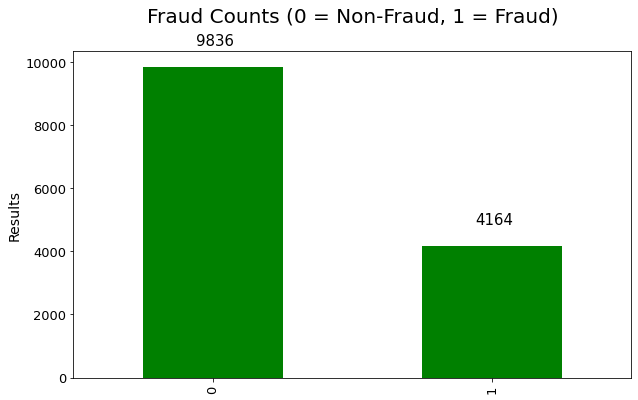

In [7]:
ax = df_train['FRAUD_NONFRAUD'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color='green')
ax.set_title('Fraud Counts (0 = Non-Fraud, 1 = Fraud)', size=20, pad=30)
ax.set_ylabel('Results', fontsize=14)

# Display values
for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [8]:
# Identify the columns with missing values
df_train.isnull().sum().sort_values(ascending=False)/len(df_train)

PH_NUM_UPDT_TS             0.504357
PWD_UPDT_TS                0.223214
CARR_NAME                  0.193500
RGN_NAME                   0.193500
STATE_PRVNC_TXT            0.193500
DVC_TYPE_TXT               0.125786
AUTHC_SCNDRY_STAT_TXT      0.005286
CUST_STATE                 0.002571
ACTVY_DT                   0.000000
TRAN_TYPE_CD               0.000000
ACTN_INTNL_TXT             0.000000
ACTN_CD                    0.000000
TRAN_DT                    0.000000
TRAN_TS                    0.000000
CUST_SINCE_DT              0.000000
TRAN_AMT                   0.000000
CUST_ZIP                   0.000000
ACCT_PRE_TRAN_AVAIL_BAL    0.000000
AUTHC_PRIM_TYPE_CD         0.000000
ALERT_TRGR_CD              0.000000
WF_dvc_age                 0.000000
OPEN_ACCT_CT               0.000000
CUST_AGE                   0.000000
FRAUD_NONFRAUD             0.000000
dtype: float64

There are eight variables with missing values. Six of those variables have at least 10% of the total data missing. Since 'PH_NUM_UPDT_TS' is a date and more than 50% of the data is missing, this variable will be removed as it is unreliable. 'PWD_UPDT_TS' will be removed for the same reasons although it is missing roughly 22% of rows. For 'CARR_NAME','RGN_NAME','STATE_PRVNC_TXT', these null values will be separated into a category of 'unknown'. Lastly, we will remove the rest of the rows containing nulls since the total nulls left is very low and will not obscure the data further.

In [9]:
df_train.drop(['PWD_UPDT_TS','PH_NUM_UPDT_TS'], inplace=True, axis=1)

df_train["CARR_NAME"].fillna("Unknown", inplace=True)
df_train["RGN_NAME"].fillna("Unknown", inplace=True)
df_train["STATE_PRVNC_TXT"].fillna("Unknown", inplace=True)

df_train = df_train.dropna()

print(df_train['ACTN_CD'].value_counts())
print('--'*20)
print(df_train['ACTN_INTNL_TXT'].value_counts())
print('--'*20)
print(df_train['TRAN_TYPE_CD'].value_counts())

SCHPMT    12141
Name: ACTN_CD, dtype: int64
----------------------------------------
P2P_COMMIT    12141
Name: ACTN_INTNL_TXT, dtype: int64
----------------------------------------
P2P    12141
Name: TRAN_TYPE_CD, dtype: int64


Since the three columns above only have one constant and distinct unit, they offer nothing in predicitve capability. They will be removed.

In [10]:
df_train.drop(['ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD'], inplace=True, axis=1)

print(df_train['TRAN_DT'].value_counts())
print('--'*20)
print(df_train['ACTVY_DT'].value_counts())

#The columns are redundant. We can remove one.
df_train.drop(['TRAN_DT'], inplace=True, axis=1)

2/28/2021              178
3/3/2021               115
3/5/2021               102
6/30/2021               98
3/1/2021                97
                      ... 
2021-11-22 00:00:00      1
2021-12-08 00:00:00      1
2021-11-17 00:00:00      1
2021-09-23 00:00:00      1
2021-03-10 00:00:00      1
Name: TRAN_DT, Length: 334, dtype: int64
----------------------------------------
2/28/2021              178
3/3/2021               115
3/5/2021               102
6/30/2021               98
3/1/2021                97
                      ... 
2021-11-22 00:00:00      1
2021-12-08 00:00:00      1
2021-11-17 00:00:00      1
2021-09-23 00:00:00      1
2021-03-10 00:00:00      1
Name: ACTVY_DT, Length: 334, dtype: int64


In [11]:
#Remove final columns with information that is redundant or not useful such as zipcode
df_train.drop(['CUST_ZIP','CUST_SINCE_DT','TRAN_TS','ACTVY_DT'], inplace=True, axis=1)

Now we will look at feautures withhigh cardinality. These feautures give the model a difficult time to find patterns and analyze feautures outside the training set.

In [12]:
df_train.dtypes

TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                   object
RGN_NAME                    object
STATE_PRVNC_TXT             object
ALERT_TRGR_CD               object
DVC_TYPE_TXT                object
AUTHC_PRIM_TYPE_CD          object
AUTHC_SCNDRY_STAT_TXT       object
CUST_STATE                  object
FRAUD_NONFRAUD               int64
dtype: object

In [13]:
# obj_df = dftrain.select_dtypes(include=['object']).copy()
# obj_df.head()

In [14]:
# obj_df["STATE_PRVNC_TXT"] = obj_df["STATE_PRVNC_TXT"].astype('category')
# obj_df["RGN_NAME"] = obj_df["RGN_NAME"].astype('category')
# obj_df["CARR_NAME"] = obj_df["CARR_NAME"].astype('category')
# obj_df["DVC_TYPE_TXT"] = obj_df["DVC_TYPE_TXT"].astype('category')
# obj_df["CUST_STATE"] = obj_df["CUST_STATE"].astype('category')
# obj_df["AUTHC_PRIM_TYPE_CD"] = obj_df["AUTHC_PRIM_TYPE_CD"].astype('category')
# obj_df["AUTHC_SCNDRY_STAT_TXT"] = obj_df["AUTHC_SCNDRY_STAT_TXT"].astype('category')
# obj_df["ALERT_TRGR_CD"] = obj_df["ALERT_TRGR_CD"].astype('category')
# obj_df.dtypes

In [15]:
# obj_df["ALERT_TRGR_CD"] = obj_df["ALERT_TRGR_CD"].cat.codes
# obj_df["STATE_PRVNC_TXT"] = obj_df["STATE_PRVNC_TXT"].cat.codes
# obj_df["RGN_NAME"] = obj_df["RGN_NAME"].cat.codes
# obj_df["CARR_NAME"] = obj_df["CARR_NAME"].cat.codes
# obj_df["DVC_TYPE_TXT"] = obj_df["DVC_TYPE_TXT"].cat.codes
# obj_df["CUST_STATE"] = obj_df["CUST_STATE"].cat.codes
# obj_df["AUTHC_PRIM_TYPE_CD"] = obj_df["AUTHC_PRIM_TYPE_CD"].cat.codes
# obj_df["AUTHC_SCNDRY_STAT_TXT"] = obj_df["AUTHC_SCNDRY_STAT_TXT"].cat.codes
# obj_df.head()

In [16]:
ord_enc = OrdinalEncoder()
df_train["RGN_NAME"] = ord_enc.fit_transform(df_train[["RGN_NAME"]])
df_train["STATE_PRVNC_TXT"] = ord_enc.fit_transform(df_train[["STATE_PRVNC_TXT"]])
df_train["CARR_NAME"] = ord_enc.fit_transform(df_train[["CARR_NAME"]])
df_train["ALERT_TRGR_CD"] = ord_enc.fit_transform(df_train[["ALERT_TRGR_CD"]])
df_train["DVC_TYPE_TXT"] = ord_enc.fit_transform(df_train[["DVC_TYPE_TXT"]])
df_train["AUTHC_PRIM_TYPE_CD"] = ord_enc.fit_transform(df_train[["AUTHC_PRIM_TYPE_CD"]])
df_train["AUTHC_SCNDRY_STAT_TXT"] = ord_enc.fit_transform(df_train[["AUTHC_SCNDRY_STAT_TXT"]])
df_train["CUST_STATE"] = ord_enc.fit_transform(df_train[["CUST_STATE"]])

df_train.dtypes

TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                  float64
RGN_NAME                   float64
STATE_PRVNC_TXT            float64
ALERT_TRGR_CD              float64
DVC_TYPE_TXT               float64
AUTHC_PRIM_TYPE_CD         float64
AUTHC_SCNDRY_STAT_TXT      float64
CUST_STATE                 float64
FRAUD_NONFRAUD               int64
dtype: object

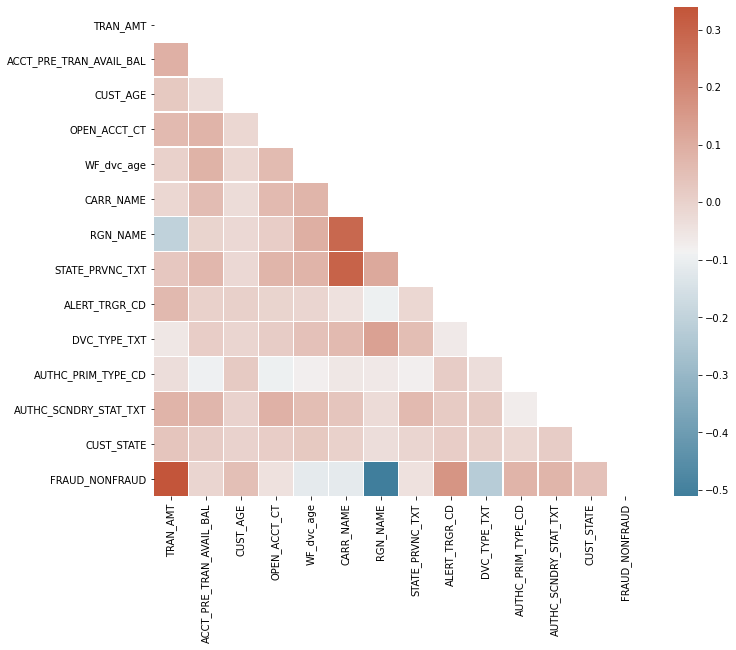

In [17]:
#Examine correlations between variables and response
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5)
plt.show()

Finally, variables will be scaled so they can be used in the Data Modelling phase.

In [18]:
df_train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,FRAUD_NONFRAUD
2,54.84,34570.63,36,8,1531,480.0,7.0,111.0,1.0,0.0,4.0,0.0,20.0,1
3,0.01,0.00,62,3,835,424.0,16.0,14.0,0.0,1.0,4.0,0.0,32.0,0
4,497.08,12725.18,81,2,1095,89.0,13.0,108.0,0.0,1.0,4.0,2.0,42.0,1
5,488.55,2851.44,45,8,1,462.0,16.0,14.0,1.0,1.0,3.0,0.0,5.0,1
7,468.40,0.00,56,6,47,424.0,16.0,14.0,1.0,1.0,4.0,0.0,4.0,0


## Data Scaling & Train/Test Split

In [19]:
predictors = ['ACCT_PRE_TRAN_AVAIL_BAL',
              'AUTHC_PRIM_TYPE_CD',
              'AUTHC_SCNDRY_STAT_TXT',
              'CARR_NAME',
              'CUST_AGE',
              'CUST_STATE',
              'OPEN_ACCT_CT',
              'RGN_NAME',
              'STATE_PRVNC_TXT',
              'TRAN_AMT',
              'WF_dvc_age']

# Create train, valid split
train, valid = train_test_split(df_train,
                                test_size=0.25,
                                random_state=1,
                                stratify=df_train['FRAUD_NONFRAUD'])

# scale all non-binary variables in training set
scaler = StandardScaler()

# fit on training df
scaler.fit(train[predictors])

# transform train & valid/test DFs
# write over existing columns w/ scaled versions
train[predictors] = scaler.transform(train[predictors])
valid[predictors] = scaler.transform(valid[predictors])

train_X = train.drop(columns='FRAUD_NONFRAUD')
train_y = train['FRAUD_NONFRAUD']

valid_X = valid.drop(columns='FRAUD_NONFRAUD')
valid_y = valid['FRAUD_NONFRAUD']

## Data Modelling

A series of models will be used to create the best chance of classifying transactions as FRAUD or NONFRAUD. 

The first model being used, logistic regression, will be used to build a predictor profile and also incorporate techniques to find the best set of variables overall. 

This knowledge will inform some of the other models being tested.

Overall, the following models will be used in this study:

- Model 1: Logistic Regression

- Model 2: XGBoost

- Model 3: Linear Discriminant Analysis

- Model 4: k-Nearest Neighbors

### Model 1: Logistic Regression

Feature importance will be determined using a basic logistic regression model. Further processing will then be done to tune and find the best model possible. 

Feature: 0, Score: 0.67689
Feature: 1, Score: -0.04457
Feature: 2, Score: 0.08727
Feature: 3, Score: -0.17888
Feature: 4, Score: -0.23774
Feature: 5, Score: 0.14155
Feature: 6, Score: -1.11296
Feature: 7, Score: 0.16350
Feature: 8, Score: 0.63454
Feature: 9, Score: -0.83783
Feature: 10, Score: 0.19958
Feature: 11, Score: 0.18152
Feature: 12, Score: 0.08835


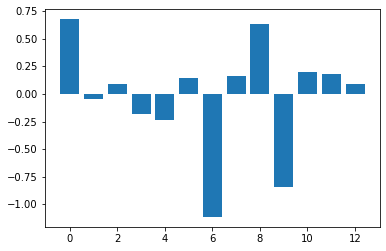

In [20]:
# Create base log_reg model

log_reg = LogisticRegression(random_state=1, penalty='l2')

# Fit model

log_reg.fit(train_X, train_y)

# Get feature importance
importance = log_reg.coef_[0]
features = ['ACCT_PRE_TRAN_AVAIL_BAL',
            'ALERT_TRGR_CD',
            'AUTHC_PRIM_TYPE_CD',
            'AUTHC_SCNDRY_STAT_TXT',
            'CARR_NAME',
            'CUST_AGE',
            'CUST_STATE',
            'DVC_TYPE_TXT',
            'OPEN_ACCT_CT',
            'RGN_NAME',
            'STATE_PRVNC_TXT',
            'TRAN_AMT',
            'WF_dvc_age']

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 
    
#for feature, importance in features, importance:
#     print('Feature: %0d, Score: %.5f' % (feature,importance))

# Plot feature importance
ax = plt.bar([x for x in range(len(importance))], importance)

plt.show()


#### Need to add labels to ths plot will figure it out#####

##### Above 0 are features that help with class 1 predictions. Below 0 lean more towards 0 predictions #####
### In our case we care more about the class 0, which is Fraud. hence, features selected are:


#####Based on this information, logreg_features = ['TRAN_AMT','CUST_AGE','CARR_NAME','STATE_PRVNC_TXT','ALERT_TRGR_CD','AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT', 'CUST_STATE']

Based on feature importance metrics, the features in the next code box are ones that will assist with FRAUD_NONFRAUD = 1 predictions. 

Now the logistic regression model will be tuned using k-fold cross-validation and gridsearch, to maximize the f1 score on predictions for the validation set. 

In [21]:
########### Logistic Regression (with k-Fold CV, Class Weights and Hyperparameter Tuning) ###########

logreg_features = ['ALERT_TRGR_CD',
                   'AUTHC_PRIM_TYPE_CD',
                   'AUTHC_SCNDRY_STAT_TXT',
                   'CARR_NAME',
                   'CUST_AGE',
                   'CUST_STATE',
                   'STATE_PRVNC_TXT',
                   'TRAN_AMT']

# Create copies of train and test code for log_reg

train_X_log_reg = train_X[logreg_features].copy()
train_y_log_reg = train_y.copy()

valid_X_log_reg = valid_X[logreg_features].copy()
valid_y_log_reg = valid_y.copy()

#### BG: change the weights below to go back to 0-1 class weights

In [23]:
########### Logistic Regression (with k-Fold CV, Class Weights and Hyperparameter Tuning) ###########

# Gridsearch on hyperparameters (class weight, penalty and regularization) to find optimal values
# Stratified cross-validation will be used in gridsearch to retain Class 1 records in each split
# Performance will be scored on f1, to balance number of positive predictions made with sensitivity. 


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

w = [{0:1.0,0:0.01}, {0:10,1:0.01}, {0:100,1:0.01}, 
     {0:1.0,1:0.001}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

log_reg = LogisticRegression(random_state=1, penalty='l2')

grid = GridSearchCV(log_reg,hyperparam_grid,scoring="f1", cv=cv, n_jobs=-1, refit=True);

grid.fit(train_X_log_reg,train_y_log_reg);

KeyboardInterrupt: 

In [ ]:
########### Logistic Regression (with k-Fold CV, Class Weights and Hyperparameter Tuning) ###########

# Best model score and best model parameters

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [ ]:
########### Logistic Regression (with k-Fold CV, Class Weights and Hyperparameter Tuning) ###########

# Fit the model with the best score

log_reg = LogisticRegression(random_state=1,
                             C=0.5,
                             class_weight={0: 1.0, 1: 10},
                             fit_intercept=False,
                             penalty='l2')

log_reg.fit(train_X_log_reg,train_y_log_reg)

### Model 2: XGBoost

Features will be chosen based on the findings from logistic regression (feature importance).

In [ ]:
########### XGBoost (with k-Fold CV and Hyperparameter Tuning) ###########

xgboost_features = ['ALERT_TRGR_CD',
                    'AUTHC_PRIM_TYPE_CD',
                    'AUTHC_SCNDRY_STAT_TXT',
                    'CARR_NAME',
                    'CUST_AGE',
                    'CUST_STATE',
                    'STATE_PRVNC_TXT',
                    'TRAN_AMT']

# Create copies of train and test code for log_reg
train_X_xgboost = train_X[xgboost_features].copy()
train_y_xgboost = train_y.copy()

valid_X_xgboost = valid_X[xgboost_features].copy()
valid_y_xgboost = valid_y.copy()

In [ ]:
# ########### XGBoost (with k-Fold CV and Hyperparameter Tuning) ###########

# Gridsearch will test weights hyperparameter with k-fold cv to find the best combination
# Weights parameter will add weighting for positive class

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_grid = {
    'max_depth': [5, 6, 7, 8], 
    'booster': ['gbtree','dart'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}

xgboost = XGBClassifier(random_state=1,use_label_encoder=False, eval_metric='logloss')

grid3 = GridSearchCV(xgboost,param_grid,scoring="f1", cv=cv, n_jobs=-1, refit=True)

grid3.fit(train_X_xgboost,train_y_xgboost)

;

In [ ]:
########### XGBoost (with k-Fold CV and Hyperparameter Tuning) ###########

# Best model score and best model parameters

print(f'Best score: {grid3.best_score_} with param: {grid3.best_params_}')

In [ ]:
########### XGBoost (with k-Fold CV and Hyperparameter Tuning) ###########

# Fit the model with the best score

xgboost = XGBClassifier(random_state=1,
                        use_label_encoder=False,
                        eval_metric='logloss',
                        booster='gbtree',
                        learning_rate=0.1,
                        max_depth=6) 

xg_boost = xgboost.fit(train_X_xgboost,train_y_xgboost)

### Model 3: Linear Discriminant Analysis

#### LDA Base

In [ ]:
# Create base log_reg model

LDA_base = LinearDiscriminantAnalysis()

# Fit model

LDA_base.fit(X=train_X, y=train_y)

lda_base_preds = LDA_base.predict(valid_X)

print(confusion_matrix(valid_y, lda_base_preds))
print(classification_report(valid_y, lda_base_preds))

#### LDA w/ Logistic Regression Selected Features

In [ ]:
# logistic regression selected features
logistic_features = ['ALERT_TRGR_CD',
                     'AUTHC_PRIM_TYPE_CD',
                     'AUTHC_SCNDRY_STAT_TXT',
                     'CARR_NAME',
                     'CUST_AGE',
                     'CUST_STATE',
                     'STATE_PRVNC_TXT',
                     'TRAN_AMT']

# Create base log_reg model
log_features_LDA = LinearDiscriminantAnalysis()

# Fit model
log_features_LDA.fit(X=train_X[logistic_features], y=train_y)

log_feature_lda_preds = log_features_LDA.predict(valid_X[logistic_features])

print(confusion_matrix(valid_y, log_feature_lda_preds))
print(classification_report(valid_y, log_feature_lda_preds))

#### LDA Feature Selection by Coeff cutoff

In [ ]:
# let's remove certain low coefficient features and compare it to our model with all features
lda_base_coef_df = pd.DataFrame.from_dict({'Feature': list(train_X.columns),
                                           'Coeffs': LDA_base.coef_.tolist()[0]})

# add in intercept point into above dataframe
intercept_df = pd.DataFrame.from_dict({'Feature': ['Intercept'],
                                       'Coeffs': LDA_base.intercept_})
# add in intercept
lda_base_coef_df = lda_base_coef_df.append(intercept_df)

lda_base_coef_df['Abs_Coeffs'] = abs(lda_base_coef_df['Coeffs'])

lda_base_coef_df.sort_values(by='Abs_Coeffs', ascending=False)

In [ ]:
bool_ = lda_base_coef_df['Abs_Coeffs'] > .1
lda_selected_coeffs = list(lda_base_coef_df.loc[bool_, 'Feature'])
lda_selected_coeffs.remove('Intercept') # happens inplaces
print('Total feature count is',len(lda_selected_coeffs), 'out of 13.')
lda_selected_coeffs

In [ ]:
# Create base log_reg model
LDA_w_subset = LinearDiscriminantAnalysis()

# Fit model
LDA_w_subset.fit(X=train_X[lda_selected_coeffs], y=train_y)

lda_subset_preds = LDA_w_subset.predict(valid_X[lda_selected_coeffs])

print(confusion_matrix(valid_y, lda_subset_preds))
print(classification_report(valid_y, lda_subset_preds))

In [ ]:
# Create base log_reg model

LDA_base = LinearDiscriminantAnalysis()

# Fit model

LDA_base.fit(X=train_X, y=train_y)

lda_base_preds = LDA_base.predict(valid_X)


In [ ]:
cross_val_score(LDA_base, train_X, train_y, cv=5, n_jobs=-1, scoring='f1')

Utilizing feature reduction via eliminating features with low coefficients appear to do mild damage to our the LDA performance.

### Model 4: KNN

In [ ]:
results = []
for k in range(4, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y) 
    results.append({'k': k,
                    'accuracy': accuracy_score(valid_y, knn.predict(valid_X)) })
# Convert results to a pandas data frame results = pd.DataFrame(results) print(results)

In [ ]:
results = pd.DataFrame(results)
print(results)

#### K=8

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8).fit(train_X, train_y)
knn_preds = knn.predict(valid_X)
print(confusion_matrix(valid_y, knn_preds))
print(classification_report(valid_y, knn_preds))

In [ ]:
cross_val_score(knn, train_X, train_y, cv=5, n_jobs=-1, scoring='f1')

#### K=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9).fit(train_X, train_y)
knn_preds = knn.predict(valid_X)
print(confusion_matrix(valid_y, knn_preds))
print(classification_report(valid_y, knn_preds))

In [ ]:
cross_val_score(knn, train_X, train_y, cv=5, n_jobs=-1, scoring='f1')

#### KNN w/ Discretized DataFrame

## Model Evaluation

In [ ]:
########### Make Predictions, Plot CM and Evaluation Metrics ###########

# Make predictions
 
log_reg_pred = log_reg.predict(valid_X_log_reg)

xgboost_pred = xgboost.predict(valid_X_xgboost)

lda_red = LDA_base.predict(valid_X)

knn_pred = knn.predict(valid_X)

In [ ]:
########### Make Predictions, Plot CM and Evaluation Metrics ###########

# Create CM tables

cm_log_reg = confusion_matrix(valid_y, log_reg_pred)

cm_xgboost = confusion_matrix(valid_y, xgboost_pred)

cm_lda = confusion_matrix(valid_y, lda_red)

cm_knn = confusion_matrix(valid_y, knn_pred)


In [ ]:
# Plot CM's

plt.figure(figsize=(12,12))
plt.suptitle('Confusion Matrices for All Models', fontsize=30,fontweight='bold')

plt.subplot(2,2,1)
plt1 = sns.heatmap(cm_log_reg, cmap='YlGnBu', annot=True, xticklabels=[0,1], yticklabels=[0,1], cbar=False,fmt='g')
plt1.set_title('Logistic Regresion',fontsize=14,fontweight='bold')
plt1.set_xlabel(xlabel='Predicted',fontsize=14)
plt1.set_ylabel(ylabel='Actual',fontsize=14)

plt.subplot(2,2,2)    
plt2 = sns.heatmap(cm_xgboost, cmap='YlGnBu', annot=True, xticklabels=[0,1], yticklabels=[0,1], cbar=False,fmt='g')
plt2.set_title('XGBoost',fontsize=14,fontweight='bold')
plt2.set_xlabel(xlabel='Predicted',fontsize=14)
plt2.set_ylabel(ylabel='Actual',fontsize=14)


plt.subplot(2,2,3)
plt3 = sns.heatmap(cm_lda, cmap='YlGnBu', annot=True, xticklabels=[0,1], yticklabels=[0,1], cbar=False,fmt='g')
plt3.set_title('LDA',fontsize=14,fontweight='bold')
plt3.set_xlabel(xlabel='Predicted',fontsize=14)
plt3.set_ylabel(ylabel='Actual',fontsize=14)


plt.subplot(2,2,4)
plt4 = sns.heatmap(cm_knn, cmap='YlGnBu', annot=True, xticklabels=[0,1], yticklabels=[0,1], cbar=False,fmt='g')
plt4.set_title('KNN',fontsize=14,fontweight='bold')
plt4.set_xlabel(xlabel='Predicted',fontsize=14)
plt4.set_ylabel(ylabel='Actual',fontsize=14)


plt.show()

In [ ]:
########### Make Predictions, Plot CM and Evaluation Metrics ###########

# Evaluation Metrics
eval_list = []

def eval_metrics(cm, model):

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    accuracy = round((TP+TN)/(TP+FP+FN+TN),3)
    recall = round((TP)/(TP+FN),3)
    specificity = round((TN)/(TN+FP),3)
    precision = round((TP)/(TP+FP),3)
    f1 = round((2*precision*recall)/(precision+recall),3)
    
    eval_list.append({'model': model, 'accuracy': accuracy, 'recall': recall,
                        'specificity': specificity, 'precision': precision, 'f1': f1})
    
eval_metrics(cm_log_reg, 'Logistic Regression')
eval_metrics(cm_xgboost, 'XGBoost')
eval_metrics(cm_knn, 'kNN') 
eval_metrics(cm_lda, 'Linear Discriminant Analysis')

eval_df = pd.DataFrame(eval_list).set_index('model')

print(eval_df.to_markdown())
   